# Deep Learning Summary Notebook

We ran a number of deep learning models. During their execution, I saved the results into a CSV file. We are now going to look at all the models and look at which ones performed the best.

For a list of architectures tested, please see [Architectures Used](#architectures_used)
section of this notebook

<font color="red">put int something about ModelWrapper</font>

The following dataset was used for all of our models:

* 200k samples of pre-processed amazon review body

Criteria for evaluation:

* We will use the same custom metric that was using for our traditional ML models so we can use one number to compare between models

    
# Conclusion

* Best deep learning model turned out to be LSTM (with balanced weights) with the following architecture
    * Embedding input layer with 300 features
    * Spatial Dropout layer - 20%
    * LSTM nodes: 64
    * Output Layer - 5 nodes with softmax activation
    * Class Weight: balanced (calculated using sklearn compute_class_weight method)
    * Loss funcation: categorical cross entropy
    * Optimizer: adam
    * Accuracy Scorer: Categorical Accuracy
* Input for this model is 200k samples of our pre-processed review body
* With only 200k samples, LSTM did not best Logistic Regression in our score ~ LSTM (~ .33) scored about 13% lower than Logistic Regression with balanced weight (~ .46)
* By using Random Under Sampling, we were able to improve the model score by 0.05. Generally, 2-star reviews are the most rare accounting for around 5% of our data. Under sampling would make all classes balanced which would allow us to retain only about 25% (5 classes * 5%) of our data. For our full dataset with 9 million samples, this would only give us 2.2 million samples. Because this drastically reduction of samples, I'm not sure if this will be a viable model. 
* Further investigation: we did see a plateau in model performance for Logistic Regression at around 500k samples. Perhaps training LSTM with the full dataset (9 million samples), it will be able to exceed the performance of Logistic Regression?




In [1]:
# import sibling utilities
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import importlib

import util.dict_util as du
import util.report_util as ru
import util.plot_util as pu

logging.basicConfig(level=logging.ERROR)

%matplotlib inline
sns.set(font_scale=2)


/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/vinceluk/anaconda3/envs/

In [2]:
# load report file form all of our deep learning models
importlib.reload(ru)
REPORT_DIR = "../reports"
REPORT_FILE = "2019-11-dl_prototype-report.csv"
ML_REPORT_FILE = f'{REPORT_DIR}/2019-11-01-run_classifiers-50k-report.csv'
report = ru.load_dnn_report(REPORT_DIR, REPORT_FILE, convert_format = True)

<a id='architectures_used'></a>
# Architectures Used

In [3]:
report[["model_name", "architecture", "description"]]

,model_name,architecture,description
0,DNN,2400x2400,2 Layer DNN with 2/3 Feature Size Hidden Units...
1,DNNB,2400x2400,"2 Layer DNN with balaned weights, 2/3 Feature ..."
2,DNN,6000x6000,2 Layer NN with the 1.5 features hidden units ...
3,CNN,1x32,"1 Layer CNN with 32 filters, kernel size 3"
4,CNNB,1x32,"1 Layer CNN with balanced weights, 32 filters,..."
5,LSTM,1x64,1 Layer LSTM 64 Units and 20% 1D Spatial Dropout
6,LSTMB,1x64,1 Layer 64 LSTM Units and 20% 1D Spatial Dropo...
7,LSTMB-bi,1x64,1 Layer Bidirectional 64 LSTM Units and 20% 1D...
8,LSTM,1x500,1 Layer LSTM 500 Units and 20% 1D Spatial Dropout
9,GRU,1x250,1 Layer GRU (250 units)


In [4]:
# load best model from traditional ML model
ml_report = ru.load_report(ML_REPORT_FILE)
ml_best = ru.load_best_from_report(ml_report)

print(f'Score for our best model: {ml_best.iloc[0].eval_metric}')

Score for our best model: 0.46556886861043434


In [5]:
# construct a temporary DF so we can plot the score for our best ML model
ml_plot_df = pd.DataFrame(report.display_name)
ml_plot_df['ml_score'] = ml_best.iloc[0].eval_metric

Best Score: 0.3941243821725579


,display_name,sampling_type,eval_metric
0,DNN (2400x2400),none,0.171430
1,DNNB (2400x2400),none,0.159874
2,DNN (6000x6000),none,0.172488
3,CNN (1x32),none,0.235893
4,CNNB (1x32),none,0.254738
5,LSTM (1x64),none,0.304897
6,LSTMB (1x64),none,0.333960
7,LSTMB-bi (1x64),none,0.295029
8,LSTM (1x500),none,0.310015
9,GRU (1x250),none,0.185876


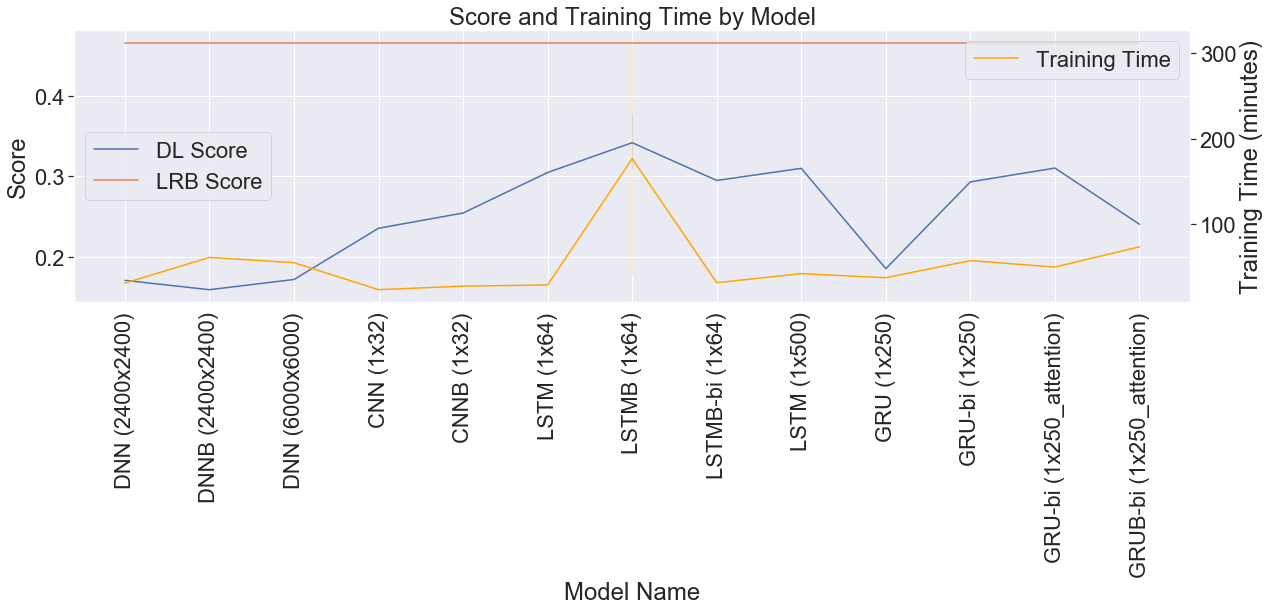

In [16]:
f, a = plt.subplots(1, 1, figsize=(20, 5))
# Plot results from DL models
a = sns.lineplot(data = report, x = "display_name", y = "eval_metric", sort = False, label="DL Score")
# Plot out score from best ML report
a = sns.lineplot(data = ml_plot_df, x = "display_name", y = "ml_score", sort = False, label="LRB Score", linestyle="--")
_ = plt.xlabel("Model Name")
_ = plt.ylabel("Score")
_ = plt.xticks(rotation=90)

a2 = a.twinx()
_ = sns.lineplot(data = report, x = "display_name", y = "train_time_min", sort = False, ax=a2, label="Training Time", color="orange")
_ = plt.ylabel("Training Time (minutes)")
a2.grid(False)

_ = plt.title("Score and Training Time by Model")


print(f'Best Score: {report.eval_metric.max()}')
report[["display_name", "sampling_type", "eval_metric"]]

# Compare with our Traditional ML model

LSTM generally has higher precision but is worse at identifying minority classes and have lower recall than logistic regression

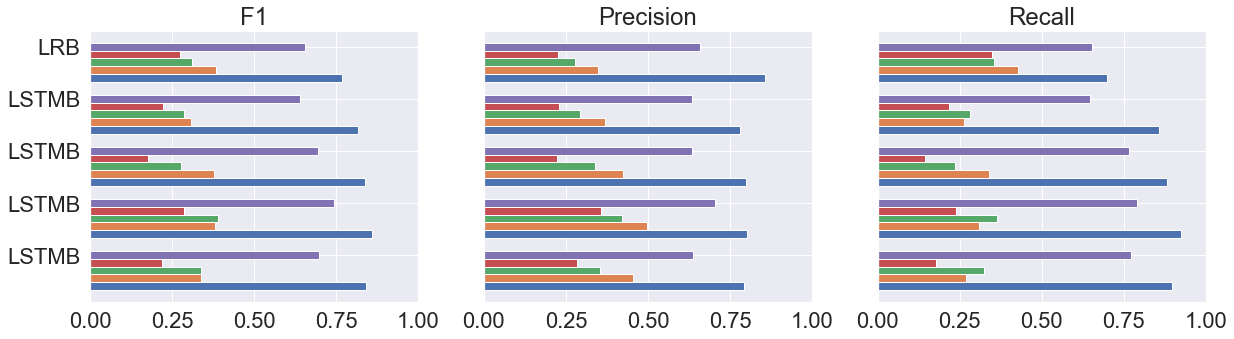

In [7]:
report_ml = ru.load_best_from_report(ML_REPORT_FILE)
report_best = report_ml.append(report[(report.model_name == "LSTMB")], sort=False)
pu.plot_score_histograms(report_best, version=2, label="model_name", sort=False)

### Scores DL models with ML models

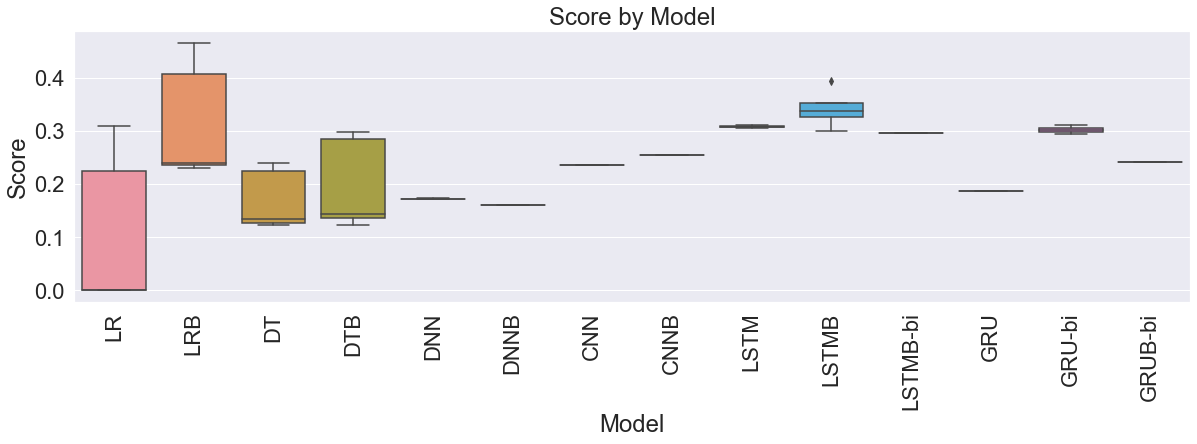

In [8]:
report_all = ru.load_report(ML_REPORT_FILE).append(ru.load_dnn_report(REPORT_DIR, REPORT_FILE, convert_format = True), 
                                                   ignore_index = True,
                                                  sort = False)
f, a = plt.subplots(1, 1, figsize=(20, 5))
sns.boxplot(data = report_all, x="model_name", y="eval_metric")
_ = plt.ylabel("Score")
_ = plt.xlabel("Model")
_ = plt.xticks(rotation=90)
_ = plt.title("Score by Model")

# Sampling for LSTM Models (Balanced Weights)

LSTM seems to be our best model so far. Since we have class imbalance for our dataset. I experimented with a couple sampling techniques to see if we can improve our model performance

### Techniques that we used:
* Random Under Sampling - this will randomly remove majority class samples until we have even distribution of all classes in our sample data. Since this technique removes a bunch of samples, I had to start with a dataset that had 1 million entries to end up with a dataset that is around 200k
* Random Over Sampling - creates balanced class distribution in our datast by duplicating minority class samples
* ADSYN - this is a synthetic over sampling technique where it will generate new samples by interpolating between minority class samples with an emphasis on creating samples near minority class samples that are wrongly classified by KNN classifier

### Sampling Result
* Random Under Sampling did the best to improve model performance and brought our score up by around 5% to .39 - however, this technique reduces our dataset significantly so I have concerns about viability of this technique
* Both methods of over sampling did not beat our model with no sampling at all
    * ADASYN actually did about 3% worse than our baseline, whereas random over sampling did roughly the same as if no sampling was done

Documentation from imbalanced-learn: https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html


,display_name,eval_metric
6,none-199134.0,0.333960
13,random_under_sampling-995688.0,0.394124
14,ADASYN-446792.0,0.300263
15,random_over_sampling-450834.0,0.338656


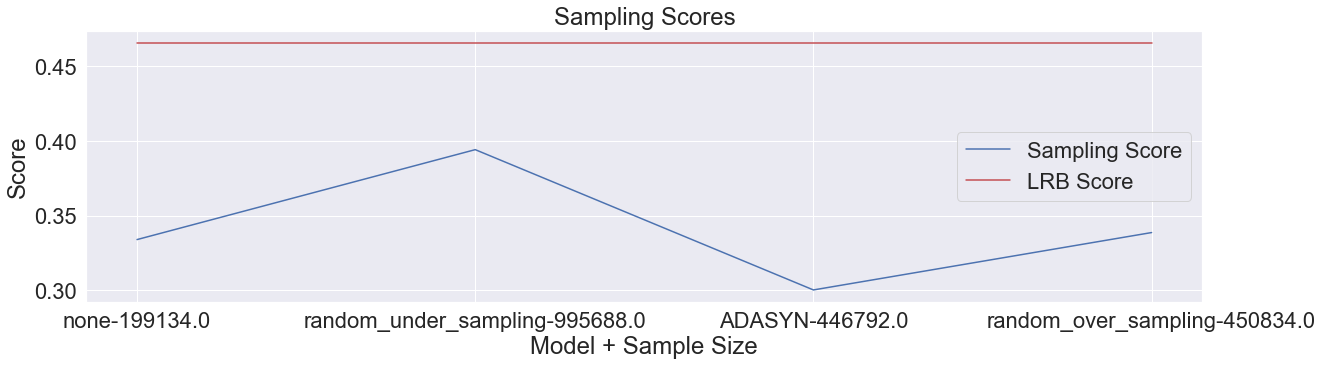

In [9]:
lstms = report[report.model_name == "LSTMB"].copy().astype({"sample_size":np.object})
lstms["display_name"] = lstms[["sample_size", "sampling_type"]].fillna("none").apply(lambda x: x.sampling_type + "-" + str(x.sample_size), axis=1)
lstms["ml_score"] = ml_best.iloc[0].eval_metric

plt.figure(figsize=(20, 5))
_ = sns.lineplot(data = lstms, y = "eval_metric", x = "display_name", sort=False, label="Sampling Score")
_ = sns.lineplot(data = lstms, y = "ml_score", x = "display_name", sort=False, color="r", label="LRB Score")
_ = plt.title("Sampling Scores")
_ = plt.xlabel("Model + Sample Size")
_ = plt.ylabel("Score")

lstms[["display_name", "eval_metric"]]

# Confusion Matrix

For random under sampling for LSTM
* 2-star ratings are most commonly being misclassified as 1-star or 2-star with more being 1-star
* 3-star ratings are most commonly being misclassified as 1-star or 4-star
* 4-star ratings are most commonly being misclassified as 5-star

In [10]:
for idx, row in report_best.iterrows():
    print(f'\n{row.model_name} Sample Size: {row.sample_size} Sampling: {row.sampling_type}')
    print("Confusion Matrix")
    cm = json.loads(row.confusion_matrix)
    print(pd.DataFrame(cm, index=np.arange(1, 6), columns=np.arange(1, 6)))



LRB Sample Size: 49784 Sampling: sampling_none
Confusion Matrix
      1    2    3     4     5
1  1134  374  139    38    50
2   247  280  187    66    26
3   115  278  414   264    96
4    69  140  392   897   605
5   157  171  362  1311  4634

LSTMB Sample Size: 199134.0 Sampling: none
Confusion Matrix
      1    2     3     4      5
1  5387  610   471   111    402
2  1512  576   671   171    295
3   829  522  1466   728    995
4   333  179   963  2232   4591
5   407  147   567  1672  23947

LSTMB Sample Size: 995688.0 Sampling: random_under_sampling
Confusion Matrix
       1     2     3     4      5
1  11195  1402   803   192    604
2   2668  1577  1440   370    544
3   1221  1015  3272  1759   1752
4    325   284  1600  5119   9210
5    475   138   674  2828  49102

LSTMB Sample Size: 446792.0 Sampling: ADASYN
Confusion Matrix
      1    2     3     4      5
1  5355  570   447   232    377
2  1464  467   581   421    292
3   835  449  1071  1300    885
4   293  242   606  2810   43

## Classification Report Histogram

* Recall for our base (LRB) is much higher for minority classes - although there is a tradeoff for recall for 1-star and 5-star reviews as they are lower
* Precision between LSTM (balanced weight) and Logistic Regression is roughly the same with LSTM using random under sampling doing the best out of all models
* Interestingly, recall for 3-star reviews is generally worse that 4-star reviews under our tradition ML models actually does better under LSTM


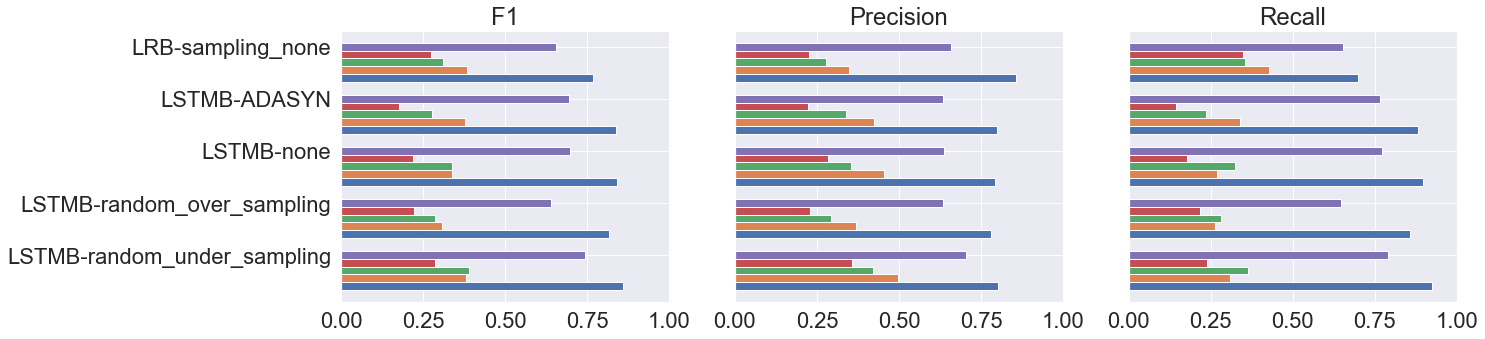

In [11]:
report_best_histo = report_best.copy()
report_best_histo["display_name"] = report_best_histo.model_name + "-" + report_best_histo.sampling_type
pu.plot_score_histograms(report_best_histo, version=2, label="display_name")


# Conclusion


* Overall LSTM using only 200k samples did not do as well as our tradition ML model - logistic regression - although as we saw in previous notebooks logistic regression plateaus at around 500k samples. If we train with the full dataset for LSTM, we may be able to improve on model performance to beat our logistic regression model - will have to try this
* With random under sampling, LSTM was able to improve by about 5%, however, this significatly reduces our dataset so I'm not sure if it's a realistic solution to our class imbalance problem

